In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('/content/heart_disease.csv')

In [ ]:
data.drop(columns=['education'], inplace=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data['Gender'] = data['Gender'].replace(['Male','Female'],[1,0])

<ipython-input-5-8e22ceba12ed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Gender'] = data['Gender'].replace(['Male','Female'],[1,0])


In [ ]:
data['prevalentStroke'] = data['prevalentStroke'].replace(['yes','no'],[1,0])

<ipython-input-6-3e7bc4748e47>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['prevalentStroke'] = data['prevalentStroke'].replace(['yes','no'],[1,0])


In [ ]:
data['Heart_ stroke'].unique()

array(['No', 'yes'], dtype=object)

In [ ]:
 data['Heart_ stroke'] = data['Heart_ stroke'].replace(['yes','No'],[1,0])

<ipython-input-8-c9bc53fd9c9e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Heart_ stroke'] = data['Heart_ stroke'].replace(['yes','No'],[1,0])


In [ ]:
data

,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


In [ ]:
data_input = data.drop(columns=['Heart_ stroke'])
data_output = data['Heart_ stroke']

In [ ]:
data_output.value_counts()

,count
Heart_ stroke,
0,3177
1,572


**DATA RESAMPLING**

In [ ]:
 from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state = 2)

In [ ]:
data_input, data_output = sm.fit_resample(data_input,data_output.ravel())

<ipython-input-14-d1832b85adcf>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  data_input, data_output = sm.fit_resample(data_input,data_output.ravel())


In [ ]:
np.unique(data_output,return_counts=True)

(array([0, 1]), array([3177, 3177]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_input_scaled = scaler.fit_transform(data_input)



**MODEL CREATION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.2)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))


0.6726986624704957


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_input_scaled, data_output, test_size=0.2)

model = LogisticRegression(max_iter=1000)  # Increased max_iter to prevent convergence warning
model.fit(x_train, y_train)

print("Accuracy:", model.score(x_test, y_test))


Accuracy: 0.6726986624704957


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(x_train, y_train)

print("Random Forest Accuracy:", rf_model.score(x_test, y_test))


Random Forest Accuracy: 0.8819826907946499


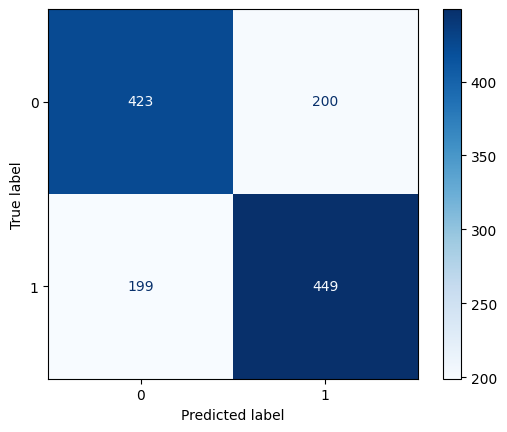

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you've already scaled the data:
x_train, x_test, y_train, y_test = train_test_split(data_input_scaled, data_output, test_size=0.2)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

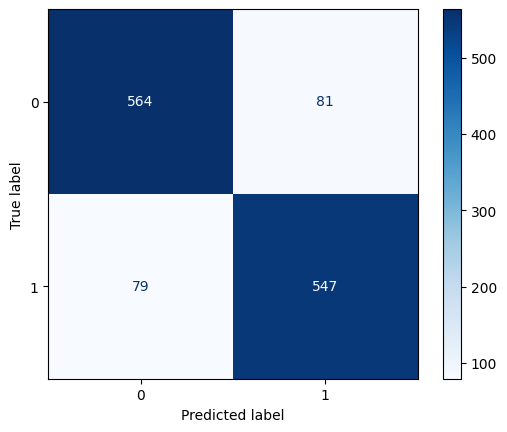

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you've already scaled the data
x_train, x_test, y_train, y_test = train_test_split(data_input_scaled, data_output, test_size=0.2)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(x_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap=plt.cm.Blues)
plt.show()


**Predicting values**

In [ ]:
input = np.array([[0,57,1,3,0,0,0,0,235,126.5,80,24.88,83,72]])

In [ ]:
x= model.predict(input)

In [ ]:
x[0]

1

In [ ]:
import pickle as pk

In [ ]:
pk.dump(model, open('heart_disease.pkl','wb'))

In [ ]:
data


,Gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
